In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') #忽视警告

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import jieba
import jieba.analyse
from wordcloud import WordCloud

In [2]:
# !pip install pandas nump matplotlib jieba wordcloud 

# 读取数据

In [3]:
df = pd.read_excel("douban_book_250.xlsx")

# 观察数据

In [4]:
df.head()

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro
0,1,红楼梦,[清]曹雪芹著,人民文学出版社,1996-12,都云作者痴，谁解其中味？,9.6,413885,59.70元,《红楼梦》是一部百科全书式的长篇小说。以宝黛爱情悲剧为主线，以四大家族的荣辱兴衰为背景，描绘...
1,2,活着,余华,作家出版社,2012-8-1,生的苦难与伟大,9.4,806552,20.00元,《活着(新版)》讲述了农村人福贵悲惨的人生遭遇。福贵本是个阔少爷，可他嗜赌如命，终于赌光了家...
2,3,1984,[英]乔治·奥威尔刘绍铭,北京十月文艺出版社,2010-4-1,栗树荫下，我出卖你，你出卖我,9.4,275815,28.00,★ 村上春树以《1Q84》向本书致敬 ★ 著名学者刘绍铭经典译本内地首次出版 ★...
3,4,三体全集 : 地球往事三部曲,刘慈欣,重庆出版社,2012-1,地球往事三部曲,9.5,178124,168.00元,《地球往事·三体》 文化大革命如火如荼进行的同时，军方探寻外星文明的绝秘计划“红岸工程...
4,5,哈利·波特,J.K.罗琳(J.K.Rowling)苏农,人民文学出版社,2008-12-1,从9¾站台开始的旅程,9.7,99452,498.00元,《哈利 · 波特 (共 7 册)(精)》编著者 J.K. 罗琳。 《哈利 · ...


# 排序

In [5]:
df.sort_values("people_num",ascending=False)#降序

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro
1,2,活着,余华,作家出版社,2012-8-1,生的苦难与伟大,9.4,806552,20.00元,《活着(新版)》讲述了农村人福贵悲惨的人生遭遇。福贵本是个阔少爷，可他嗜赌如命，终于赌光了家...
51,52,追风筝的人,[美]卡勒德·胡赛尼李继宏,上海人民出版社,2006-5,为你，千千万万遍,8.9,785004,29.00元,12 岁的阿富汗富家少爷阿米尔与仆人哈桑情同手足。然而，在一场风筝比赛后，发生了一件悲惨不堪...
223,224,解忧杂货店,[日]东野圭吾李盈春,南海出版公司,2014-5,现代人内心流失的东西，这家杂货店能帮你找回,8.5,752001,39.50元,现代人内心流失的东西，这家杂货店能帮你找回—— 僻静的街道旁有一家杂货店，只要写下烦恼...
12,13,小王子,[法]圣埃克苏佩里马振聘,人民文学出版社,2003-8,献给长成了大人的孩子们,9.1,743060,22.00元,小王子是一个超凡脱俗的仙童，他住在一颗只比他大一丁点儿的小行星上。陪伴他的是一朵他非常喜爱的...
61,62,嫌疑人X的献身,[日]东野圭吾刘子倩,南海出版公司,2008-9,数学好是一种极致的浪漫,8.9,514982,28.00,百年一遇的数学天才石神，每天唯一的乐趣，便是去固定的便当店买午餐，只为看一眼在便当店做事的邻...
...,...,...,...,...,...,...,...,...,...,...
244,245,坟,鲁迅,人民文学出版社,2006-12,NaN,9.6,11445,16.00元,《从一到无穷大：科学中的事实和臆测》是当今世界最有影响的科普经典名著之一，1970 年代末由...
226,227,会饮篇,[古希腊]柏拉图王太庆,商务印书馆,2013-1,NaN,9.3,11008,12.00元,柏拉图（约前 427—前 347），古希腊哲学家，也是西方最伟大的哲学家和思想家之一。本书是...
235,236,规训与惩罚 : 监狱的诞生,[法]米歇尔·福柯刘北成,生活·读书·新知三联书店,2003-1,伴随着惩罚的人性化，自由反而日益丧失了,9.3,10528,21.80元,卡尔维诺“我们的祖先”三部曲之一。“我们的祖先”三部曲包括：《不存在的骑士》《分成两半的子爵...
243,244,跨越边界的社区（修订版） : 北京“浙江村”的生活史,项飙,生活·读书·新知三联书店,2018-3,NaN,9.5,9005,68.00元,本书是大学生必读丛书中的一册，书中以教育部全国高等学校中文学科教学指导委员会指定书目为依据，...


In [6]:
df.sort_values("score",ascending=False)

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro
4,5,哈利·波特,J.K.罗琳(J.K.Rowling)苏农,人民文学出版社,2008-12-1,从9¾站台开始的旅程,9.7,99452,498.00元,《哈利 · 波特 (共 7 册)(精)》编著者 J.K. 罗琳。 《哈利 · ...
170,171,南京大屠杀 : 第二次世界大战中被遗忘的大浩劫,[美]张纯如（IrisChang）谭春霞,中信出版社,2015-8,NaN,9.7,15299,49.00元,《地下室手记》是俄国作家陀思妥耶夫斯基创作的长篇小说。该书由主角地下室人以第一人称的方式叙述...
0,1,红楼梦,[清]曹雪芹著,人民文学出版社,1996-12,都云作者痴，谁解其中味？,9.6,413885,59.70元,《红楼梦》是一部百科全书式的长篇小说。以宝黛爱情悲剧为主线，以四大家族的荣辱兴衰为背景，描绘...
244,245,坟,鲁迅,人民文学出版社,2006-12,NaN,9.6,11445,16.00元,《从一到无穷大：科学中的事实和臆测》是当今世界最有影响的科普经典名著之一，1970 年代末由...
43,44,卡拉马佐夫兄弟,[俄]陀思妥耶夫斯基荣如德,上海译文出版社,2015-2-1,NaN,9.6,29809,CNY 78.00,本书系俄国大作家陀思妥耶夫斯基代表作之一。小说通过一桩真实的弑父案，描写老卡拉马佐夫同三个儿...
...,...,...,...,...,...,...,...,...,...,...
190,191,送你一颗子弹,刘瑜,上海三联书店,2010-1,在这本书里，被“审视”的东西杂七杂八,8.6,142691,25.00元,当这个世界都要崩溃；当星辰和阳光也熄灭，当马蹄踏过弱者的尸骨，当黑暗的血色吞噬人心，不死的鹰...
236,237,亲爱的安德烈,龙应台,人民文学出版社,2008-12,弭平代沟，跨越文化阻隔,8.6,121023,26.00,安德烈十四岁的时候，龙应台离开欧洲，返回台湾，就任台北市首任文化局长。等她卸任回到儿子身边，...
234,235,目送,龙应台,生活·读书·新知三联书店,2009-10,不必追,8.6,210667,39.00元,《众病之王：癌症传》是一部饱含人文主义色彩的社科文化著作。作者悉达多•穆克吉历时六年，凭借翔...
221,222,骆驼祥子,老舍,人民文学出版社,2000-3-1,旧中国老北京贫苦市民的典型命运,8.6,204343,12.00,2015 年度诺贝尔文学奖得主阿列克谢耶维奇最具分量的作品 发表后荣获德国书业和平奖（...


# 数据筛选

In [7]:
author_list = ["鲁迅","三毛","金庸","王小波"]

filtered_authors_df = df[df['authors'].isin(author_list)]


In [8]:
filtered_authors_df.head(2) #看前两行

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro
13,14,撒哈拉的故事,三毛,哈尔滨出版社,2003-8,游荡的自由灵魂,9.2,167776,15.80元,安徒生是丹麦19世纪著名童话作家，世界文学童话创始人。他生于欧登塞城一个贫苦鞋匠家庭，早年在...
15,16,天龙八部,金庸,生活·读书·新知三联书店,1994-5,有情皆孽，无人不冤,9.2,130360,96.00元,天龙八部乃金笔下的一部长篇小说，与《射雕》，《神雕》等 几部长篇小说一起被称为可读性最高的金...


# 单变量分析

## 类别变量

In [9]:
df[["publisher"]].value_counts()

publisher   
人民文学出版社         37
上海译文出版社         22
生活·读书·新知三联书店    19
译林出版社           14
南海出版公司          11
                ..
广西美术出版社          1
文汇出版社            1
时代文艺出版社          1
春风文艺出版社          1
陕西人民出版社          1
Length: 72, dtype: int64

In [10]:
df[["authors"]].value_counts()

authors       
三毛                6
鲁迅                6
王小波               5
金庸                5
龙应台               4
                 ..
[美]欧文·斯通常涛        1
[美]沃尔特·艾萨克森管延圻    1
[美]洛莉·戈特利布果麦文化    1
[美]特德·姜李克勤        1
（清）沈复             1
Length: 202, dtype: int64

In [11]:
table = filtered_authors_df[["authors"]].value_counts()

<Axes: >

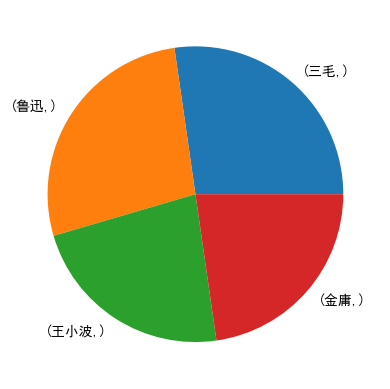

In [12]:
table.plot.pie()

<Axes: xlabel='authors'>

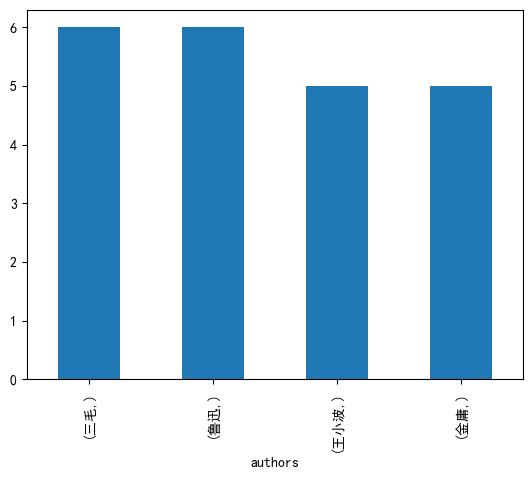

In [13]:
table.plot.bar()

## 数值变量

In [14]:
df["score"].describe()

count    250.000000
mean       9.055600
std        0.242454
min        8.500000
25%        8.900000
50%        9.100000
75%        9.200000
max        9.700000
Name: score, dtype: float64

<Axes: ylabel='Density'>

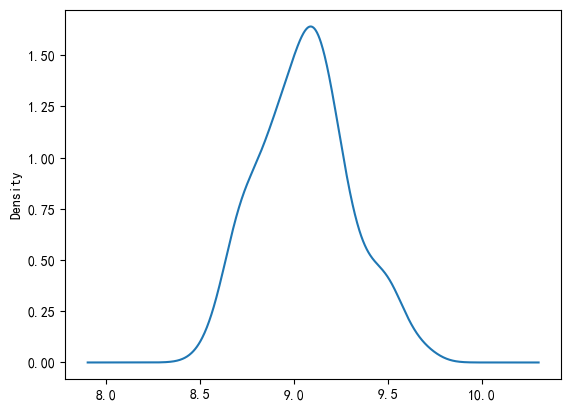

In [15]:
df["score"].plot.kde() #核密度图

In [16]:
df["people_num"].describe()

count       250.000000
mean      84868.508000
std      119972.051193
min        8548.000000
25%       24023.250000
50%       45378.500000
75%       88350.750000
max      806552.000000
Name: people_num, dtype: float64

<Axes: ylabel='Frequency'>

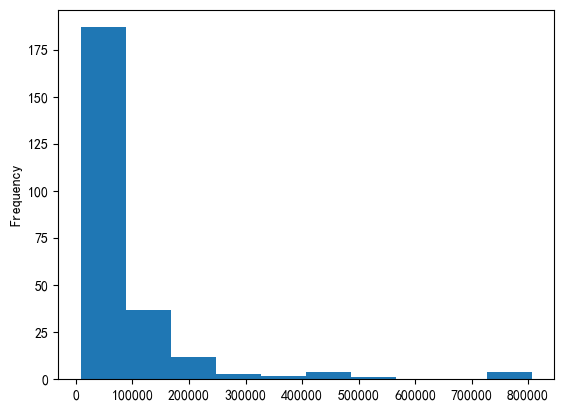

In [17]:
df["people_num"].plot.hist()

# 多变量分析

## 类别变量+数值变量

In [18]:
df.groupby(by="authors").score.mean() # 不同作者书籍的平均评分

authors
(俄罗斯)陀思妥耶夫斯基曾思艺          9.300
(德)叔本华韦启昌                9.200
J.K.罗琳(J.K.Rowling)苏农    9.700
[以色列]尤瓦尔·赫拉利林俊宏          9.100
[俄]列夫·托尔斯泰草婴             9.200
                         ...  
鲁迅                       9.350
黄元吉                      9.500
龙应台                      8.675
（丹麦）安徒生叶君健               9.300
（清）沈复                    8.700
Name: score, Length: 202, dtype: float64

In [19]:
pd.pivot_table(df,index=["publisher"],values=["score","people_num"],aggfunc=np.mean)

,people_num,score
publisher,,
1981-8,130422.000000,9.300000
万卷出版公司,20500.000000,9.100000
上海三联书店,109487.000000,8.850000
上海人民出版社,170108.000000,9.000000
上海古籍出版社,33725.000000,9.200000
...,...,...
译林出版社,55064.428571,8.971429
辽宁教育出版社,33976.000000,9.200000
重庆出版社,97985.500000,9.500000


In [20]:
filtered_authors_df .groupby(by="authors").score.mean() # 不同作者书籍的平均评分

authors
三毛     8.966667
王小波    8.940000
金庸     9.000000
鲁迅     9.350000
Name: score, dtype: float64

In [21]:
pd.pivot_table(filtered_authors_df ,index=["authors"],values=["score","people_num"],aggfunc=np.mean)

,people_num,score
authors,,
三毛,74035.000000,8.966667
王小波,95179.000000,8.940000
金庸,87942.400000,9.000000
鲁迅,77612.333333,9.350000


## 数值变量+数值变量

相关分析：
- 取值范围：-1~1
- 大于0代表正相关，小于0代表负相关
- 绝对值越接近0代表关联度越小，绝对值越接近1代表关联度越大

In [22]:
df[["score","people_num"]].corr()

,score,people_num
score,1.00000,-0.08216
people_num,-0.08216,1.00000


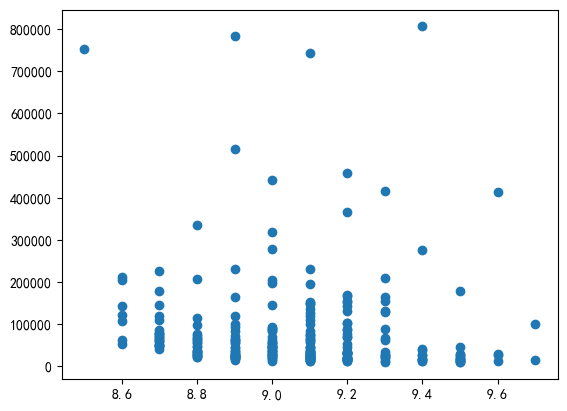

In [23]:
plt.scatter(df.score,df.people_num)

# 文本分析

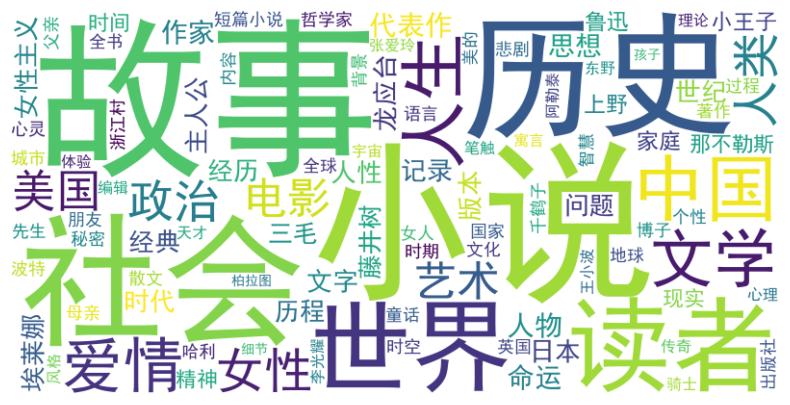

In [26]:
import jieba

# 使用jieba进行中文分词
def chinese_segmentation(text):
    words = jieba.cut(text, cut_all=False, HMM=True)
    return " ".join(words)

# 对DataFrame的'intro'列应用中文分词
df['intro_segmented'] = df['intro'].apply(chinese_segmentation)

# 从外部文件读取停用词列表
jieba.analyse.set_stop_words("stopwords.txt")


# 创建词云，并排除停用词
def generate_wordcloud(text):
    # 使用 jieba.analyse.extract_tags 提取关键词
    keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True, allowPOS=('n', 'nr', 'ns'))#allowPOS=('n', 'nr', 'ns')：表示仅考虑名词（'n'）、人名（'nr'）、地名（'ns'）等词性的词语作为关键词。这是通过词性标注来筛选关键词的一种方式。

    # 构建关键词和权重的字典
    keywords_dict = {word: weight for word, weight in keywords}

    # 创建词云
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=100, 
        collocations=False, 
        font_path= r'C:\Windows\Fonts\simhei.ttf',  # 使用支持中文的字体（黑体）
    ).generate_from_frequencies(keywords_dict)
    
    # 显示词云图像
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 对所有'intro_segmented'文本进行拼接
all_intro_text = " ".join(df['intro_segmented'])

# 生成并显示词云
generate_wordcloud(all_intro_text)
